# Nuclear Game - Analysis
Gabriel Emilio Herrera Oropeza <br>
13/06/2022

This document describes the workflow to analyze data from segmented images that were previously processed by `insert tool name`. We will show how to import, visualise, filter and cluster the data using robust, simple-to-use functions. Many of these functions take up positional arguments that can be modified. To display the usage of these functions, run `help(name_of_function)`.

We begin by importing the `tool name` module.

In [2]:
import ngtools.analyzer as ngt

## Importing segmented data



In [3]:
path_to_experiments = "/media/cdn-bc/RAID/Projects/FH021_Marcelo_seganalysis/outputs/Day14_INs"
nga = ngt.NuclearGame_Analyzer(path_to_experiments)

## Accessing NGA data

In [4]:
nga.dim()

(4380, 41)


In [4]:
nga.nrow()
nga.ncol()

4380
41


In [5]:
nga.colnames()

Index(['cellID', 'avg_intensity_dapi', 'nuclear_area', 'nuclear_perimeter',
       'major_axis', 'minor_axis', 'axes_ratio', 'circularity', 'eccentricity',
       'solidity', 'x_pos', 'y_pos', 'angle', 'imageID',
       'avg_intensity_core_dapi', 'avg_intensity_internal_ring_dapi',
       'avg_intensity_external_ring_dapi', 'total_intensity_core_dapi',
       'total_intensity_internal_ring_dapi',
       'total_intensity_external_ring_dapi', 'total_intensity_dapi',
       'avg_intensity_beta3', 'total_intensity_beta3', 'avg_intensity_rfp',
       'total_intensity_rfp', 'avg_intensity_laminB1',
       'total_intensity_laminB1', 'beta3_x_rfp', 'beta3_x_laminB1',
       'rfp_x_laminB1', 'beta3_x_rfp_x_laminB1', 'dna_peaks', 'dna_dots',
       'dna_dots_size_median', 'spatial_entropy', 'beta3_group', 'rfp_group',
       'laminB1_group', 'iNs', 'experiment', 'path2ong'],
      dtype='object')


In [7]:
nga.showData()

      cellID  avg_intensity_dapi  nuclear_area  nuclear_perimeter  major_axis  \
0          1                 756           107                 40        12.9   
1          2                 779            10                 14         5.7   
2          3                 629           166                 47        15.4   
3          4                 905            94                 36        12.4   
4          5                 874           103                 38        11.6   
...      ...                 ...           ...                ...         ...   
4375      26                 844           101                 44        18.1   
4376      27                 929            26                 20         7.1   
4377      28                1186            31                 21         7.1   
4378      29                1036            79                 37        15.0   
4379      30                 760            62                 32        11.7   

      minor_axis  axes_rati

In [9]:
nga.showData(vars = ['cellID', 'avg_intensity_rfp'])

      cellID  avg_intensity_rfp
0          1                499
1          2                294
2          3                334
3          4               1512
4          5                460
...      ...                ...
4375      26                319
4376      27                586
4377      28               1114
4378      29                352
4379      30                471

[4380 rows x 2 columns]


## Plotting data

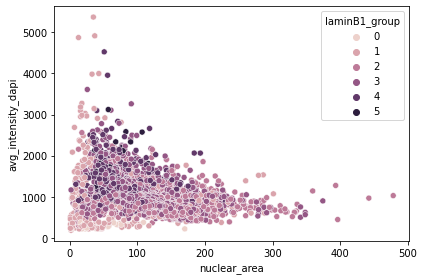

In [10]:
nga.plotData(x = "nuclear_area", y = "avg_intensity_dapi", hue = "laminB1_group")

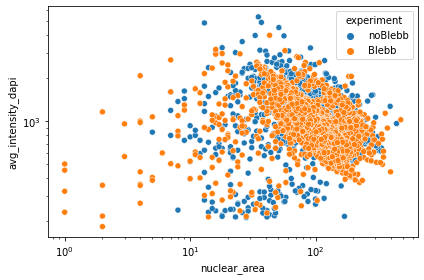

In [11]:
nga.plotData(x = "nuclear_area", y = "avg_intensity_dapi", x_trans = "log", y_trans = "log", hue = "experiment")

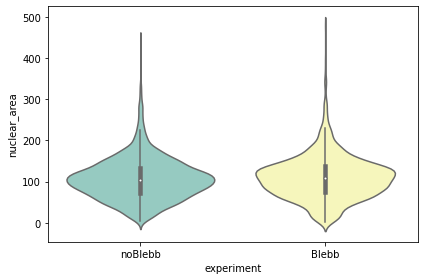

In [12]:
nga.plotData(x="experiment", y = "nuclear_area", plot_type = "violin")

### Center DAPI

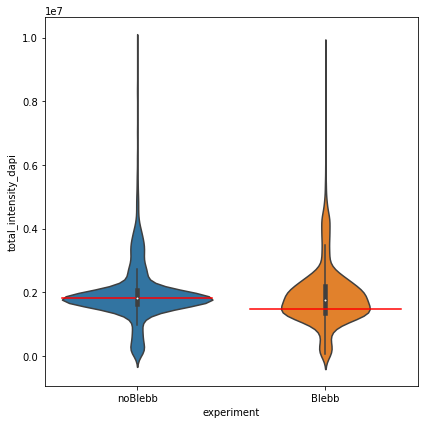

In [5]:
nga.ctrDAPI()

### Identify Single Cells
Identify single cells based on DNA marker content.

In [6]:
nga.findSingleCells()
nga.showData()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 95.63it/s]


      cellID  avg_intensity_dapi  nuclear_area  nuclear_perimeter  major_axis  \
0          1          745.886473           107                 40        12.9   
1          2          768.578786            10                 14         5.7   
2          3          620.585439           166                 47        15.4   
3          4          892.893199            94                 36        12.4   
4          5          862.307907           103                 38        11.6   
...      ...                 ...           ...                ...         ...   
4375      26         1031.545163           101                 44        18.1   
4376      27         1135.433005            26                 20         7.1   
4377      28         1449.540952            31                 21         7.1   
4378      29         1266.209466            79                 37        15.0   
4379      30          928.879531            62                 32        11.7   

      minor_axis  axes_rati

Check selection of single cells:

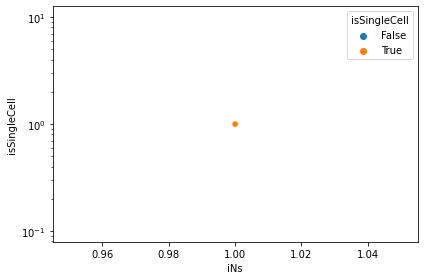

In [25]:
nga.plotData("iNs", "isSingleCell", 
                hue = "isSingleCell", alpha = 0.5, 
                y_trans = "log")

In [7]:
# Keep only single cells
nga.filterCells(expr = "isSingleCell == True")

In [8]:
nga.dim()

(2983, 42)


### Intensity Normalisation
Statistic-based normalisation of intensity data. **Options are: mode, mean, and median.** *nbins* is used only when method is *mode*. DAPI channel is not normalised.

In [9]:
nga.normIntensity(method = "mode", nbins = 100)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 62.64it/s]


Observe data before normalisation for a channel. The red line represents the statistical method value used for normalisation.

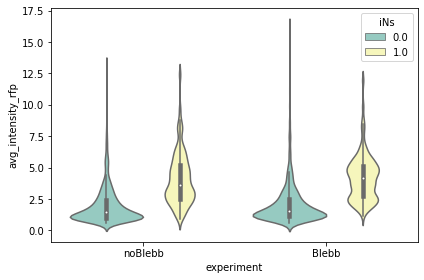

In [10]:
nga.plotData("experiment", "avg_intensity_rfp", plot_type = "violin", data_type="norm", hue="iNs")

## Data Exploration

### Linear relationships

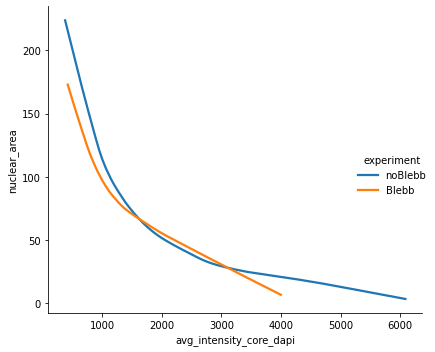

In [37]:
nga.plotData("avg_intensity_core_dapi", "nuclear_area", plot_type = "line", hue="experiment", data_type="norm")

### Dimension Reduction

In [12]:
nga.colnames()

Index(['cellID', 'avg_intensity_dapi', 'nuclear_area', 'nuclear_perimeter',
       'major_axis', 'minor_axis', 'axes_ratio', 'circularity', 'eccentricity',
       'solidity', 'x_pos', 'y_pos', 'angle', 'imageID',
       'avg_intensity_core_dapi', 'avg_intensity_internal_ring_dapi',
       'avg_intensity_external_ring_dapi', 'total_intensity_core_dapi',
       'total_intensity_internal_ring_dapi',
       'total_intensity_external_ring_dapi', 'total_intensity_dapi',
       'avg_intensity_beta3', 'total_intensity_beta3', 'avg_intensity_rfp',
       'total_intensity_rfp', 'avg_intensity_laminB1',
       'total_intensity_laminB1', 'beta3_x_rfp', 'beta3_x_laminB1',
       'rfp_x_laminB1', 'beta3_x_rfp_x_laminB1', 'dna_peaks', 'dna_dots',
       'dna_dots_size_median', 'spatial_entropy', 'beta3_group', 'rfp_group',
       'laminB1_group', 'iNs', 'experiment', 'path2ong', 'isSingleCell'],
      dtype='object')


In [13]:
nga.buildAData(excluded_features=['angle','iNs','total_intensity_core_dapi', 'total_intensity_internal_ring_dapi',
                                 'total_intensity_external_ring_dapi', 'total_intensity_dapi', 'total_intensity_rfp',
                                 'total_intensity_laminB1', 'total_intensity_beta3', 'beta3_x_rfp', 'beta3_x_laminB1',
                                 'rfp_x_laminB1', 'beta3_x_rfp_x_laminB1'])
nga.normAData()

In [16]:
nga.showADataVars()
nga.showADataObs()

['avg_intensity_dapi', 'nuclear_area', 'nuclear_perimeter', 'major_axis', 'minor_axis', 'axes_ratio', 'circularity', 'eccentricity', 'solidity', 'avg_intensity_core_dapi', 'avg_intensity_internal_ring_dapi', 'avg_intensity_external_ring_dapi', 'avg_intensity_beta3', 'avg_intensity_rfp', 'avg_intensity_laminB1', 'dna_peaks', 'dna_dots', 'dna_dots_size_median', 'spatial_entropy']
['cellID', 'x_pos', 'y_pos', 'angle', 'imageID', 'total_intensity_core_dapi', 'total_intensity_internal_ring_dapi', 'total_intensity_external_ring_dapi', 'total_intensity_dapi', 'total_intensity_beta3', 'total_intensity_rfp', 'total_intensity_laminB1', 'beta3_x_rfp', 'beta3_x_laminB1', 'rfp_x_laminB1', 'beta3_x_rfp_x_laminB1', 'beta3_group', 'rfp_group', 'laminB1_group', 'iNs', 'experiment', 'path2ong', 'isSingleCell']


#### UMAP

In [18]:
nga.findNeighbours(method = "umap")
nga.findClusters(method = "leiden", res=0.6)
nga.runDimReduc(method = "umap")

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:06)
running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


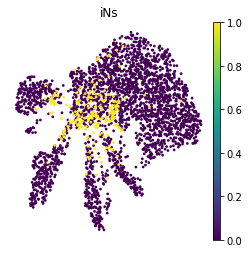

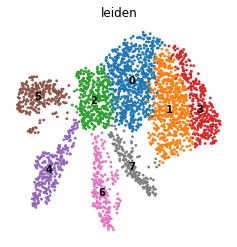

In [21]:
# Plot UMAP showing features
nga.plotDim(hue = "iNs", method="umap")
nga.plotDim(hue = "leiden", method="umap")

#### DIFFMAP

In [22]:
nga.findNeighbours(method = "gauss")
nga.findClusters(method = "leiden")
nga.runDimReduc(method = "diffmap")

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
running Leiden clustering
    finished: found 7 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9763488  0.96536624 0.9556655  0.9333475  0.92776835
     0.9019881  0.8808762  0.86114705 0.85812485 0.8373876  0.83103716
     0.820881   0.8172447  0.809236  ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)


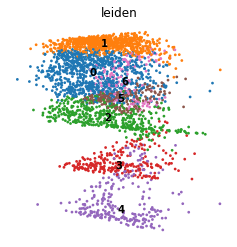

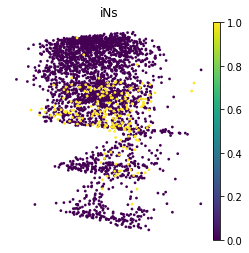

In [23]:
nga.plotDim(hue = "leiden", method="diffmap")
nga.plotDim(hue = "iNs", method="diffmap")

#### Pseudotime
Choose a root cell for diffusion pseudotime:

In [16]:
nga.runPT(root = 0)

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


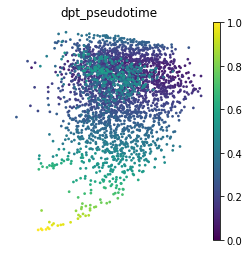

In [18]:
nga.plotDim(hue = "dpt_pseudotime", method="diffmap")

#### Stacked violin plot

In [ ]:
fig, ax = plt.subplots(figsize = (5, 7))
sc.pl.stacked_violin(adata, data_cols, groupby = 'experiment', swap_axes = True, ax = ax, dendrogram = True)
fig.tight_layout()
plt.show()

#### Pseudotime - heatmap

In [ ]:
# Enter order of clusters in pseudotime
pseudotime_path = [3,4,7]

In [ ]:
# Heatmap - pseudotime
sc.pl.paga_path(
    adata, 
    pseudotime_path, 
    data_cols,
    show_node_names = True,
    n_avg = 50,
    annotations = ['dpt_pseudotime'],
    show_colorbar = True,
    color_map = 'coolwarm',
    groups_key = 'leiden',
    color_maps_annotations = {'dpt_pseudotime': 'viridis'},
    title = 'Path',
    return_data = False,
    normalize_to_zero_one = True,
    show = True
)

### Save Object

In [ ]:
adata.write("/save/path/filename.hdf5")